In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import datetime

In [2]:
data_copy=pd.read_excel('Online_Retail.xlsx')
data=data_copy


In [3]:
# Remove null values
data = data.dropna()

#Removing Duplicates
data = data.drop_duplicates()


# Drop irrelevant columns
data = data.drop(['Description'], axis=1)

# Convert data types
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['CustomerID'] = data['CustomerID'].astype(int)


In [4]:
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,4,2011-12-09 12:50:00,4.15,12680,France


In [5]:
# Number of unique customers
num_customers = len(data['CustomerID'].unique())

# Number of unique transactions
num_transactions = len(data['InvoiceNo'].unique())

# Number of unique products
num_products = len(data['StockCode'].unique())

# Print the results
print('Number of unique customers:', num_customers)
print('Number of unique transactions:', num_transactions)
print('Number of unique products:', num_products)


Number of unique customers: 4372
Number of unique transactions: 22190
Number of unique products: 3684


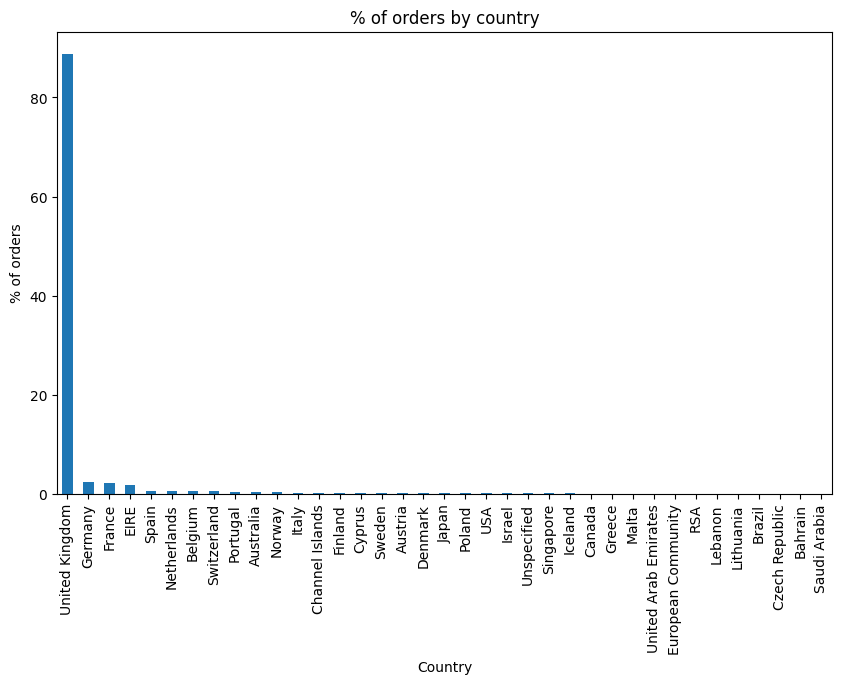

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


# Compute the percentage of orders from each country
country_counts = data['Country'].value_counts(normalize=True) * 100

# Create a bar plot of the results
fig, ax = plt.subplots(figsize=(10, 6))
country_counts.plot(kind='bar', ax=ax)
ax.set_xlabel('Country')
ax.set_ylabel('% of orders')
ax.set_title('% of orders by country')
plt.show()


# Case 1

In [7]:
data = data[data['Country'] == 'United Kingdom']
data = data.reset_index(drop=True)
data

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
356723,581585,22466,12,2011-12-09 12:31:00,1.95,15804,United Kingdom
356724,581586,22061,8,2011-12-09 12:49:00,2.95,13113,United Kingdom
356725,581586,23275,24,2011-12-09 12:49:00,1.25,13113,United Kingdom
356726,581586,21217,24,2011-12-09 12:49:00,8.95,13113,United Kingdom


In [8]:
count=0
for i in range(len(data["Quantity"])):
    if(data["Quantity"][i]<0):
        count+=1
print(f"The cancelled orders are {count} in number")
        


The cancelled orders are 7501 in number


In [9]:
data=data[data["Quantity"]>0]
data = data.reset_index(drop=True)
data
        

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...
349222,581585,22466,12,2011-12-09 12:31:00,1.95,15804,United Kingdom
349223,581586,22061,8,2011-12-09 12:49:00,2.95,13113,United Kingdom
349224,581586,23275,24,2011-12-09 12:49:00,1.25,13113,United Kingdom
349225,581586,21217,24,2011-12-09 12:49:00,8.95,13113,United Kingdom


In [10]:
# Number of unique customers
num_customers = len(data['CustomerID'].unique())

# Number of unique transactions
num_transactions = len(data['InvoiceNo'].unique())

# Number of unique products
num_products = len(data['StockCode'].unique())

# Print the results
print('Number of unique customers:', num_customers)
print('Number of unique transactions:', num_transactions)
print('Number of unique products:', num_products)

Number of unique customers: 3921
Number of unique transactions: 16649
Number of unique products: 3645


In [11]:
# Create a new column called 'InvoiceMonth'
data['InvoiceMonth'] = pd.to_datetime(data['InvoiceDate']).dt.to_period('M').dt.to_timestamp()

# Extract information about the first month of each transaction, grouped by CustomerID
first_month_data = data.groupby('CustomerID')['InvoiceMonth'].min().reset_index()
#First month to check how old the customer is based on the min value of the Invoice month
first_month_data


,CustomerID,InvoiceMonth
0,12346,2011-01-01
1,12747,2010-12-01
2,12748,2010-12-01
3,12749,2011-05-01
4,12820,2011-01-01
...,...,...
3916,18280,2011-03-01
3917,18281,2011-06-01
3918,18282,2011-08-01
3919,18283,2011-01-01


In [12]:

# Create a new column with the first date of the month
data['InvoiceMonth'] = pd.to_datetime(data['InvoiceDate']).dt.to_period('M').dt.to_timestamp()
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceMonth'].transform('min')
data['CohortIndex'] = data['InvoiceMonth'].dt.month - data['CohortMonth'].dt.month + 1

# Calculate the difference in months between the InvoiceMonth and CohortMonth
def calculate_cohort_interval(df):
    df['CohortIndex'] = df['InvoiceMonth'].dt.to_period('M').astype(int) - df['CohortMonth'].dt.to_period('M').astype(int) + 1
    return df


data = data.groupby(['CohortMonth', 'CohortIndex']).apply(calculate_cohort_interval)


In [13]:
data["CohortIndex"].value_counts()

1     103680
2      25048
4      24209
3      24097
6      23189
5      23001
7      20761
8      20640
9      20562
12     20467
10     19888
11     17332
13      6353
Name: CohortIndex, dtype: int64

In [14]:
cohort_data = data.groupby(['CohortMonth', 'CohortIndex']).agg({'CustomerID': pd.Series.nunique}).reset_index()
cohort_matrix = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
print(cohort_matrix)
data[:]


CohortIndex     1      2      3      4      5      6      7      8      9   \
CohortMonth                                                                  
2010-12-01   815.0  289.0  263.0  304.0  293.0  323.0  291.0  278.0  289.0   
2011-01-01   358.0   76.0   93.0   84.0  119.0   99.0   90.0   87.0  108.0   
2011-02-01   340.0   64.0   66.0   97.0   98.0   86.0   87.0   96.0   90.0   
2011-03-01   419.0   64.0  109.0   83.0   94.0   69.0  111.0   96.0  119.0   
2011-04-01   277.0   58.0   56.0   60.0   56.0   61.0   61.0   73.0   20.0   
2011-05-01   256.0   48.0   44.0   44.0   53.0   58.0   68.0   23.0    NaN   
2011-06-01   214.0   38.0   31.0   51.0   51.0   69.0   21.0    NaN    NaN   
2011-07-01   169.0   30.0   33.0   39.0   47.0   18.0    NaN    NaN    NaN   
2011-08-01   141.0   32.0   32.0   34.0   17.0    NaN    NaN    NaN    NaN   
2011-09-01   276.0   63.0   83.0   32.0    NaN    NaN    NaN    NaN    NaN   
2011-10-01   324.0   79.0   36.0    NaN    NaN    NaN    NaN    

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
349222,581585,22466,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,2011-12-01,2011-05-01,8
349223,581586,22061,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,2011-12-01,2010-12-01,13
349224,581586,23275,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,2011-12-01,2010-12-01,13
349225,581586,21217,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,2011-12-01,2010-12-01,13


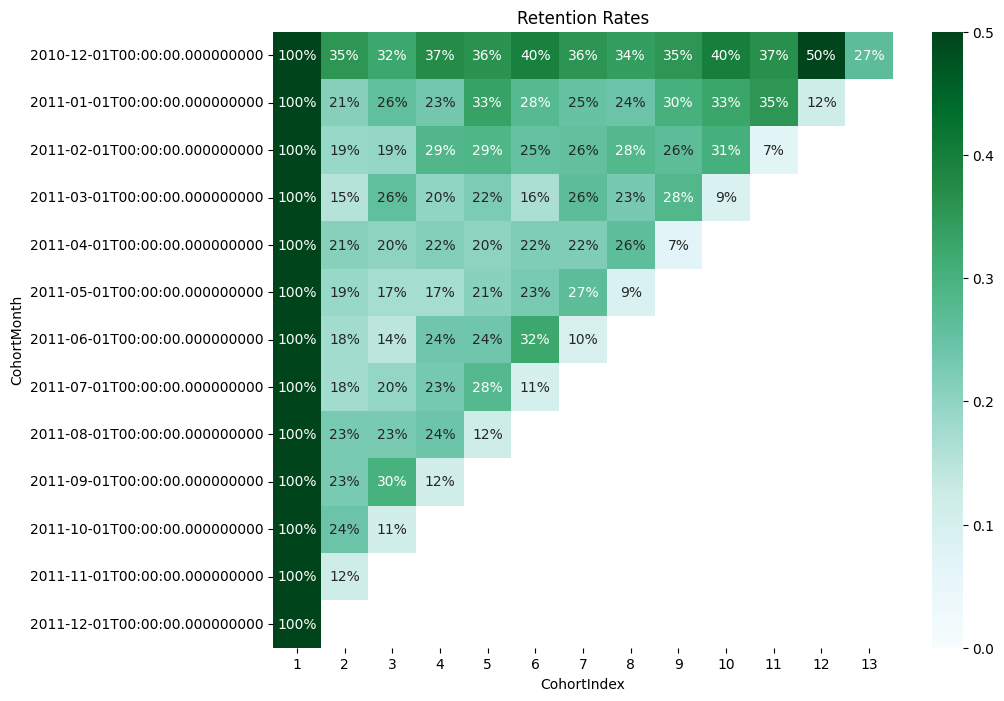

In [15]:

# Step 3: Create cohort analysis matrix
cohort_counts = pd.pivot_table(data, index='CohortMonth', columns='CohortIndex', values='CustomerID', aggfunc=pd.Series.nunique)
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Step 5: Create heatmap
plt.figure(figsize=(10, 8))
plt.title('Retention Rates')
sns.heatmap(data=retention, annot=True, cmap='BuGn', fmt='.0%', vmin=0, vmax=0.5)
plt.show()

In [16]:
reference_date=data.InvoiceDate.max()
reference_date=reference_date+datetime.timedelta(days=1)#timedelta function returns to total number of seconds
print(data.InvoiceDate.max(),data.InvoiceDate.min())
reference_date

2011-12-09 12:49:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:49:00')

In [17]:
data['days_since_last_purchase']=reference_date-data.InvoiceDate
data['days_since_last_purchase_num']=data['days_since_last_purchase'].astype('timedelta64[D]')
data['days_since_last_purchase_num'].head()    

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [18]:
customer_history_df=data.groupby('CustomerID').min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
print(customer_history_df.describe())
customer_history_df.head()

         CustomerID      Recency
count   3921.000000  3921.000000
mean   15561.471563    92.188472
std     1576.823683    99.528995
min    12346.000000     1.000000
25%    14208.000000    18.000000
50%    15569.000000    51.000000
75%    16913.000000   143.000000
max    18287.000000   374.000000


<ipython-input-18-edb3d2e14b3e>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  customer_history_df=data.groupby('CustomerID').min().reset_index()[['CustomerID', 'days_since_last_purchase_num']]


,CustomerID,Recency
0,12346,326.0
1,12747,2.0
2,12748,1.0
3,12749,4.0
4,12820,3.0


In [19]:
data.describe()

,Quantity,UnitPrice,CustomerID,CohortIndex,days_since_last_purchase,days_since_last_purchase_num
count,349227.000000,349227.000000,349227.000000,349227.000000,349227,349227.000000
mean,12.181295,2.972124,15548.333625,5.126385,152 days 09:22:10.464139372,151.850642
std,191.797470,17.990307,1594.403077,3.840520,113 days 03:00:44.028768830,113.141808
min,1.000000,0.000000,12346.000000,1.000000,1 days 00:00:00,1.000000
25%,2.000000,1.250000,14191.000000,1.000000,48 days 01:39:00,48.000000
50%,4.000000,1.950000,15518.000000,4.000000,131 days 23:12:00,131.000000
75%,12.000000,3.750000,16931.000000,8.000000,247 days 01:09:00,247.000000
max,80995.000000,8142.750000,18287.000000,13.000000,374 days 04:23:00,374.000000


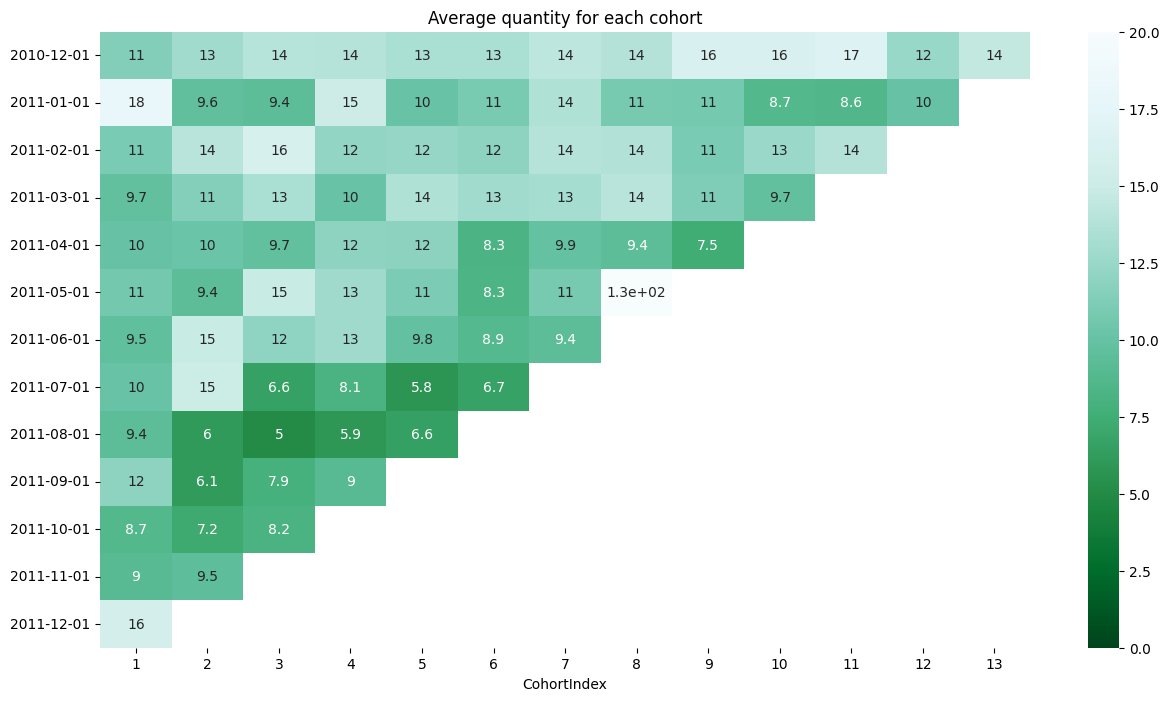

In [20]:
#Average quantity for each cohort
grouping = data.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()

In [21]:
df=data
df

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,days_since_last_purchase,days_since_last_purchase_num
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1,374 days 04:23:00,374.0
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,374 days 04:23:00,374.0
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1,374 days 04:23:00,374.0
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,374 days 04:23:00,374.0
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,374 days 04:23:00,374.0
...,...,...,...,...,...,...,...,...,...,...,...,...
349222,581585,22466,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,2011-12-01,2011-05-01,8,1 days 00:18:00,1.0
349223,581586,22061,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,2011-12-01,2010-12-01,13,1 days 00:00:00,1.0
349224,581586,23275,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,2011-12-01,2010-12-01,13,1 days 00:00:00,1.0
349225,581586,21217,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,2011-12-01,2010-12-01,13,1 days 00:00:00,1.0


In [22]:
df['TotalSum'] = df['UnitPrice']* df['Quantity']

#Data preparation steps
print('Min Invoice Date:',df.InvoiceDate.dt.date.min(),'max Invoice Date:',
       df.InvoiceDate.dt.date.max())

df.head(3)

Min Invoice Date: 2010-12-01 max Invoice Date: 2011-12-09


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,days_since_last_purchase,days_since_last_purchase_num,TotalSum
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,1,374 days 04:23:00,374.0,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,1,374 days 04:23:00,374.0,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,1,374 days 04:23:00,374.0,22.00


In [23]:
df['InvoiceDay'] = df['InvoiceDate'].apply(lambda x: datetime.datetime(x.year, x.month, x.day))

act_date = max(df['InvoiceDay'] + datetime.timedelta(1))
df['TotalSum'] = df['Quantity'] * df['UnitPrice']
df.drop(['CohortMonth', 'InvoiceMonth', 'CohortIndex'], axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,days_since_last_purchase,days_since_last_purchase_num,TotalSum,InvoiceDay
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,374 days 04:23:00,374.0,15.30,2010-12-01
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,374 days 04:23:00,374.0,20.34,2010-12-01
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,374 days 04:23:00,374.0,22.00,2010-12-01
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,374 days 04:23:00,374.0,20.34,2010-12-01
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,374 days 04:23:00,374.0,20.34,2010-12-01


In [24]:
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (act_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalSum' : 'sum'
    
})


rfm.rename(columns = {'InvoiceDate' : 'Recency', 
                      'InvoiceNo' : 'Frequency', 
                      'TotalSum' : 'MonetaryValue'}, inplace = True)
CustomerID=[]
for i in rfm.index:
    CustomerID.append(i)
rfm["CustomerID"]=CustomerID

rfm.head()

,Recency,Frequency,MonetaryValue,CustomerID
CustomerID,,,,
12346,325,1,77183.60,12346
12747,2,103,4196.01,12747
12748,0,4413,33053.19,12748
12749,3,199,4090.88,12749
12820,3,59,942.34,12820


In [25]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'],q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm_np=rfm.to_numpy()
rfm_np[:,0]


array([325, 2, 0, ..., 7, 3, 42], dtype=object)

In [26]:
rfm_agg = rfm.groupby('RFM_Score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'MonetaryValue' : ['mean', 'count']
})

rfm_agg.rename(columns = {'mean' : 'Mean','count' : 'Count'},
               inplace = True)

rfm_agg.round(2).head()

Recency Frequency MonetaryValue      
             Mean      Mean          Mean Count
RFM_Score                                      
3          258.11      8.06        151.94   343
4          175.35     13.63        233.51   361
5          151.40     20.54        354.69   471
6           97.04     28.13        823.31   427
7           78.56     38.43        734.08   387

In [27]:
rfm.groupby(['RFM_Segment']).size().sort_values(ascending=False)[:5]

RFM_Segment
4.04.04.0    407
1.01.01.0    343
3.04.04.0    184
1.02.02.0    178
2.01.01.0    166
dtype: int64

In [28]:
rfm[rfm['RFM_Segment']=='211'].head()

,Recency,Frequency,MonetaryValue,CustomerID,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,,


In [29]:
rfm.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean',
                             'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           258.1       8.1         151.9   343
4           175.4      13.6         233.5   361
5           151.4      20.5         354.7   471
6            97.0      28.1         823.3   427
7            78.6      38.4         734.1   387
8            60.1      54.5         906.4   413
9            46.9      77.7        1792.5   377
10           32.3     111.1        1914.7   387
11           20.1     182.3        3434.5   348
12            6.6     360.5        8254.6   407

In [30]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Category1'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Category2'
    else:  
        return 'Category3'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Category1          19.4     221.7        4637.3  1142
Category2          71.3      49.1        1051.0  1604
Category3         189.9      14.8         258.3  1175

In [31]:
rfm_rfm = rfm[['Recency','Frequency','MonetaryValue']]
print(rfm_rfm.describe())

           Recency    Frequency  MonetaryValue
count  3921.000000  3921.000000    3921.000000
mean     91.722265    89.065800    1857.950687
std      99.528532   214.022733    7477.736186
min       0.000000     1.000000       0.000000
25%      17.000000    17.000000     298.110000
50%      50.000000    40.000000     644.300000
75%     142.000000    98.000000    1570.810000
max     373.000000  7676.000000  259657.300000


<ipython-input-32-75b5cb1a8eb8>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
<ipython-input-32-75b5cb1a8eb8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
<ipython-input-32-75b5cb1a8eb8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot

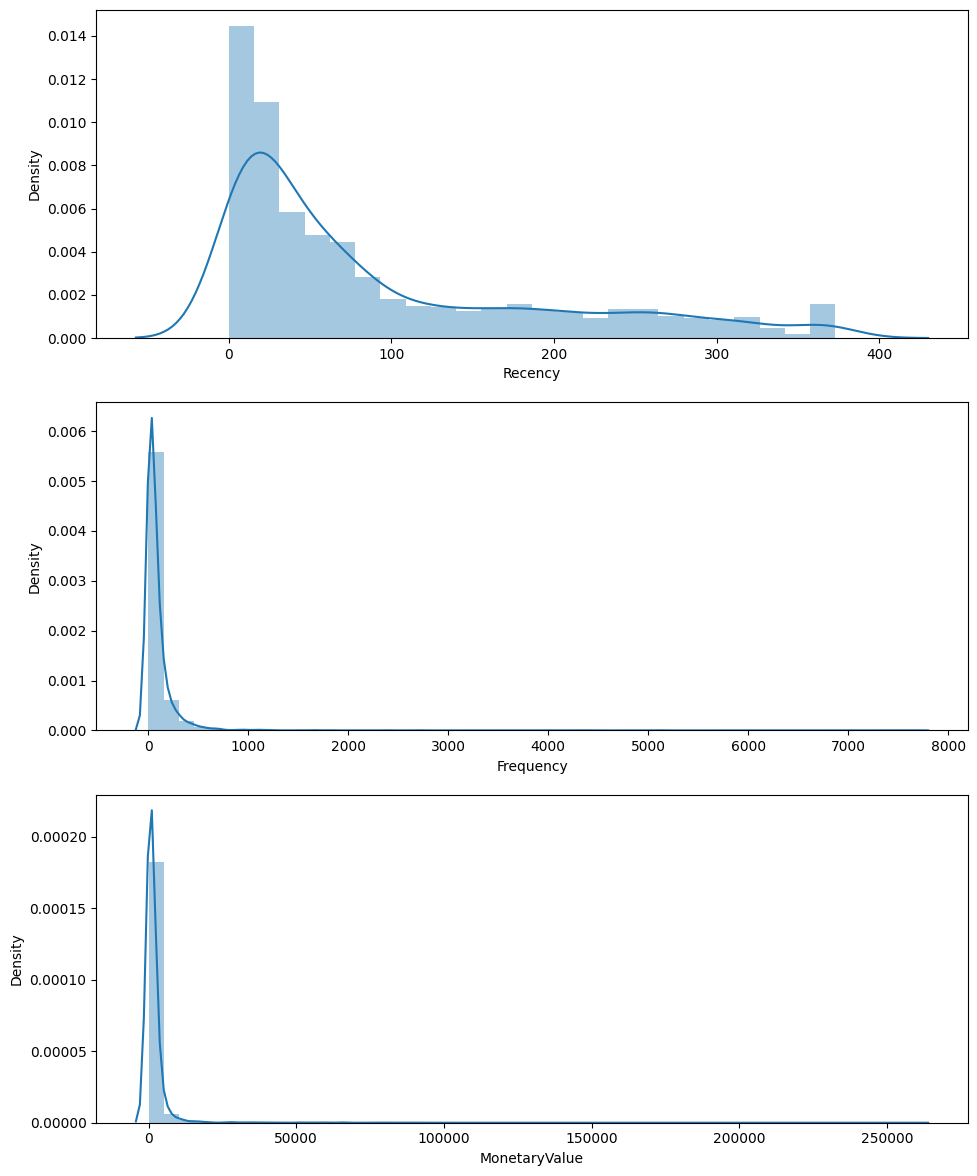

In [32]:
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

In [33]:
rfm['Recency'].replace(0, np.nan, inplace=True)
rfm['Frequency'].replace(0, np.nan, inplace=True)
rfm['MonetaryValue'].replace(0, np.nan, inplace=True)
rfm.dropna(inplace=True)
# rfm = rfm.rest_index(drop=True)
rfm

,Recency,Frequency,MonetaryValue,CustomerID,R,F,M,RFM_Segment,RFM_Score,General_Segment
CustomerID,,,,,,,,,,
12346,325.0,1,77183.60,12346,1,1,4,1.01.04.0,6,Category2
12747,2.0,103,4196.01,12747,4,4,4,4.04.04.0,12,Category1
12749,3.0,199,4090.88,12749,4,4,4,4.04.04.0,12,Category1
12820,3.0,59,942.34,12820,4,3,3,4.03.03.0,10,Category1
12821,214.0,6,92.72,12821,1,1,1,1.01.01.0,3,Category3
...,...,...,...,...,...,...,...,...,...,...
18280,277.0,10,180.60,18280,1,1,1,1.01.01.0,3,Category3
18281,180.0,7,80.82,18281,1,1,1,1.01.01.0,3,Category3
18282,7.0,12,178.05,18282,4,1,1,4.01.01.0,6,Category2


In [34]:
rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1)
rfm_log.dropna()
rfm = rfm.reset_index(drop=True)
rfm.describe()

,Recency,Frequency,MonetaryValue,CustomerID,RFM_Score
count,3892.000000,3892.000000,3892.000000,3892.000000,3892.000000
mean,92.402107,86.557554,1690.493606,15561.494090,7.464543
std,99.585156,199.436131,5508.790350,1575.889195,2.812486
min,1.000000,1.000000,3.750000,12346.000000,3.000000
25%,17.000000,16.000000,296.170000,14208.750000,5.000000
50%,51.000000,40.000000,639.820000,15567.500000,7.000000
75%,143.250000,97.000000,1544.450000,16910.500000,10.000000
max,373.000000,7676.000000,194390.790000,18287.000000,12.000000


In [35]:
rfm_log

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,5.783825,0.000000,11.253942
12747,0.693147,4.634729,8.341889
12749,1.098612,5.293305,8.316515
12820,1.098612,4.077537,6.848366
12821,5.365976,1.791759,4.529584
...,...,...,...
18280,5.624018,2.302585,5.196285
18281,5.192957,1.945910,4.392224
18282,1.945910,2.484907,5.182064


In [36]:
rfm_log.replace([np.inf, -np.inf], np.nan, inplace=False)



,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,5.783825,0.000000,11.253942
12747,0.693147,4.634729,8.341889
12749,1.098612,5.293305,8.316515
12820,1.098612,4.077537,6.848366
12821,5.365976,1.791759,4.529584
...,...,...,...
18280,5.624018,2.302585,5.196285
18281,5.192957,1.945910,4.392224
18282,1.945910,2.484907,5.182064


In [37]:
scaler = StandardScaler()

scaler.fit(rfm_log)

rfm_normalized= scaler.transform(rfm_log)
rfm_normalized

array([[ 1.39906241, -2.74699588,  3.84752817],
       [-2.12141097,  0.74882739,  1.48024274],
       [-1.84101038,  1.24556943,  1.45961556],
       ...,
       [-1.25505904, -0.87271272, -1.08846317],
       [-1.84101038,  2.21656326,  0.89617351],
       [-0.0159625 ,  0.45750401,  0.808889  ]])

In [38]:
rfm_normalized = pd.DataFrame(rfm_normalized,columns = ['Recency', 'Frequency', 'MonetaryValue'])
# rfm_normalized.replace([np.inf, -np.inf, 0], np.nan, inplace=True)
# rfm_normalized.dropna(inplace=True)
rfm_normalized

,Recency,Frequency,MonetaryValue
0,1.399062,-2.746996,3.847528
1,-2.121411,0.748827,1.480243
2,-1.841010,1.245569,1.459616
3,-1.841010,0.328556,0.266118
4,1.110098,-1.395531,-1.618882
...,...,...,...
3887,1.288547,-1.010232,-1.076903
3888,0.990446,-1.279260,-1.730545
3889,-1.255059,-0.872713,-1.088463
3890,-1.841010,2.216563,0.896174


<ipython-input-39-29d1636eac20>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1); sns.distplot(rfm_normalized.Recency, label = 'Recency')
<ipython-input-39-29d1636eac20>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(rfm_normalized.Recency, label = 'Recency')
<ipython-input-39-29d1636eac20>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar fle

<function matplotlib.pyplot.show(close=None, block=None)>

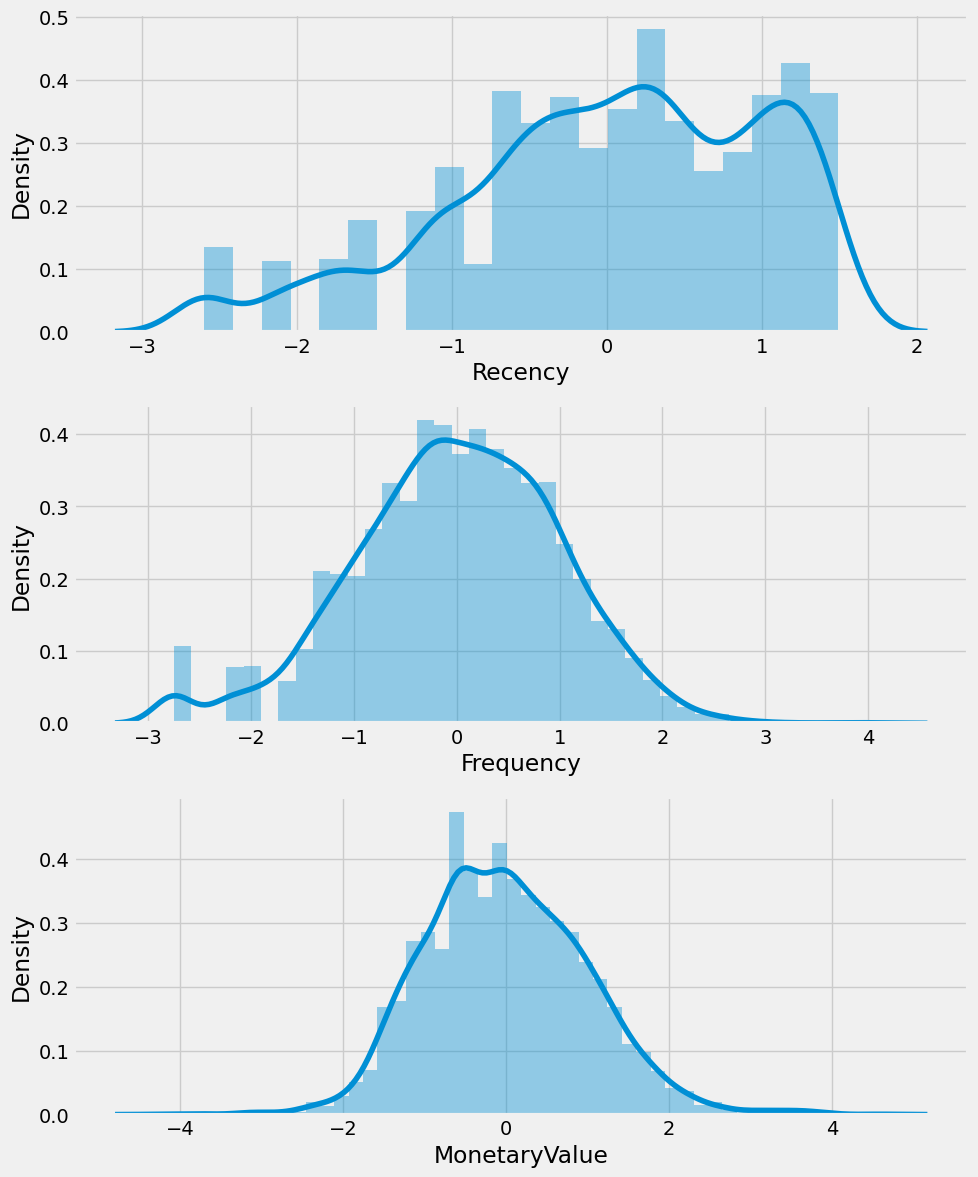

In [39]:
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfm_normalized.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_normalized.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_normalized.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show

In [40]:
import numpy as np
import random

class KMeans:
    def __init__(self, n_clusters=8, max_iter=300, init='k-means++', random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.init = init
        self.random_state = random_state

    def fit(self, X):
        if self.init == 'k-means++':
            self.centroids = self.k_means_pp_init(X)
        else:
            self.centroids = self.random_init(X)

        for i in range(self.max_iter):
            old_centroids = np.copy(self.centroids)
            clusters = self.assign_clusters(X, self.centroids)
            self.centroids = self.update_centroids(X, clusters)

            if np.array_equal(old_centroids, self.centroids):
                break

        self.labels_ = self.predict(X)
        self.inertia_ = self.compute_inertia(X, clusters)

    def k_means_pp_init(self, X):
        n_samples, n_features = X.shape
        centroids = np.empty((self.n_clusters, n_features))

        # randomly select the first centroid
        random_idx = random.randint(0, n_samples - 1)
        centroids[0] = X[random_idx]

        # select remaining centroids using k-means++ algorithm
        for i in range(1, self.n_clusters):
            distances = np.empty((n_samples, i))
            for j in range(i):
                distances[:, j] = np.linalg.norm(X - centroids[j], axis=1)

            # choose next centroid using minimum distance squared
            prob = np.min(distances, axis=1) ** 2
            prob /= np.sum(prob)
            next_centroid_idx = np.random.choice(n_samples, p=prob)
            centroids[i] = X[next_centroid_idx]

        return centroids

    def random_init(self, X):
        n_samples, n_features = X.shape
        random_idx = np.random.choice(n_samples, size=self.n_clusters, replace=False)
        return X[random_idx]

    def assign_clusters(self, X, centroids):
        distances = np.empty((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - centroids[i], axis=1)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X, clusters):
        centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[clusters == i], axis=0)
        return centroids

    def predict(self, X):
        distances = np.empty((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return np.argmin(distances, axis=1)

    def compute_inertia(self, X, clusters):
        inertia = 0
        for i in range(self.n_clusters):
            inertia += np.sum((X[clusters == i] - self.centroids[i]) ** 2)
        return inertia


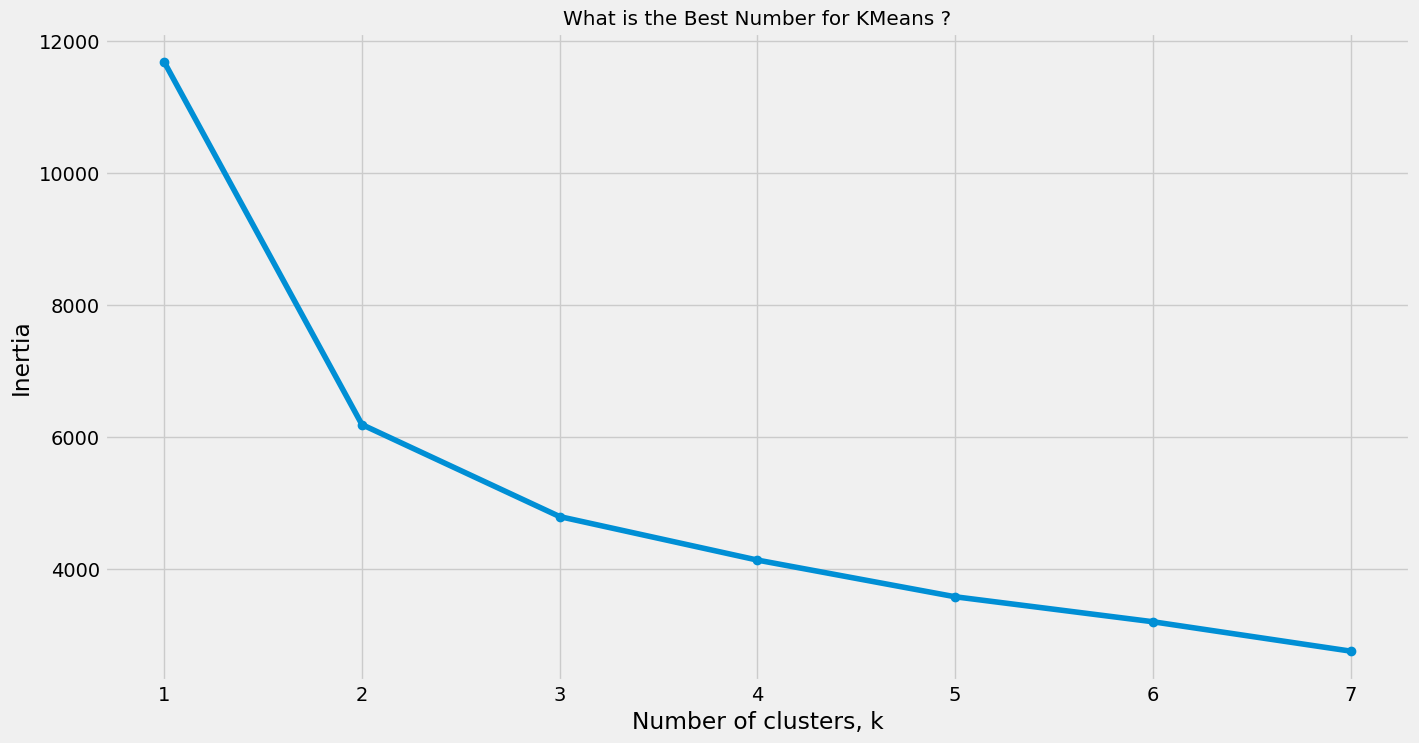

In [41]:
ks = range(1,8)
inertias=[]
for k in ks :
    # Create a KMeans clusters
    kc = KMeans(n_clusters=k)
    kc.fit(rfm_normalized.to_numpy())
    inertias.append(kc.inertia_)

# Plot ks vs inertias
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')
plt.show()

In [42]:
#From the above implementation of elbow method we can see that the optimaal value for the k means is 3
kc = KMeans(n_clusters=3)
rfm_norm_np=rfm_normalized.to_numpy()
rfm_norm_np.shape
kc.fit(rfm_norm_np)
kc.labels_.shape
rfm['RFM Cluster'] = kc.labels_

rfm_s=rfm.groupby('RFM Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']})


rfm_s.rename(columns = {'mean' : 'Mean','count' : 'Count'},
               inplace = True)



display(rfm_s.style.background_gradient(cmap='Pastel1'))

In [43]:
rfm['RFM Cluster']=rfm['RFM Cluster'].map({0: 'K_C1', 1: 'K_C2',2:'K_C3'})
rfm.sample(40)

,Recency,Frequency,MonetaryValue,CustomerID,R,F,M,RFM_Segment,RFM_Score,General_Segment,RFM Cluster
1594,103.0,47,1370.60,15095,2,3,3,2.03.03.0,8,Category2,K_C3
2472,9.0,79,1328.55,16295,4,3,3,4.03.03.0,10,Category1,K_C1
1908,64.0,210,1921.55,15518,2,4,4,2.04.04.0,10,Category1,K_C3
1061,16.0,90,1614.91,14336,4,3,4,4.03.04.0,11,Category1,K_C1
3152,15.0,54,280.09,17247,4,3,1,4.03.01.0,8,Category2,K_C3
2560,21.0,7,126.25,16414,3,1,1,3.01.01.0,5,Category3,K_C2
3519,50.0,71,772.55,17764,3,3,3,3.03.03.0,9,Category2,K_C3
2149,33.0,62,1048.49,15839,3,3,3,3.03.03.0,9,Category2,K_C3
1927,114.0,29,85.13,15541,2,2,1,2.02.01.0,5,Category3,K_C2
2097,5.0,10,635.68,15773,4,1,2,4.01.02.0,7,Category2,K_C3


In [44]:
rfm

,Recency,Frequency,MonetaryValue,CustomerID,R,F,M,RFM_Segment,RFM_Score,General_Segment,RFM Cluster
0,325.0,1,77183.60,12346,1,1,4,1.01.04.0,6,Category2,K_C3
1,2.0,103,4196.01,12747,4,4,4,4.04.04.0,12,Category1,K_C1
2,3.0,199,4090.88,12749,4,4,4,4.04.04.0,12,Category1,K_C1
3,3.0,59,942.34,12820,4,3,3,4.03.03.0,10,Category1,K_C1
4,214.0,6,92.72,12821,1,1,1,1.01.01.0,3,Category3,K_C2
...,...,...,...,...,...,...,...,...,...,...,...
3887,277.0,10,180.60,18280,1,1,1,1.01.01.0,3,Category3,K_C2
3888,180.0,7,80.82,18281,1,1,1,1.01.01.0,3,Category3,K_C2
3889,7.0,12,178.05,18282,4,1,1,4.01.01.0,6,Category2,K_C2
3890,3.0,721,2045.53,18283,4,4,4,4.04.04.0,12,Category1,K_C1


In [45]:
rfm_normalized = pd.DataFrame(rfm_normalized,index=rfm.index,columns=rfm_rfm.columns)

rfm_normalized['K_Cluster'] = kc.labels_
rfm_normalized['General_Segment'] = rfm['General_Segment']
# rfm_normalized.shape
rfm_normalized['CustomerID'] = rfm['CustomerID']
rfm_normalized.reset_index(inplace = True)
rfm_normalized

#Melt the data into a long format so RFM values and metric names are stored in 1 column each
rfm_melt = pd.melt(rfm_normalized,id_vars=['CustomerID','General_Segment','K_Cluster'],value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Metric',value_name='Value')
rfm_melt.head()


,CustomerID,General_Segment,K_Cluster,Metric,Value
0,12346,Category2,2,Recency,1.399062
1,12747,Category1,0,Recency,-2.121411
2,12749,Category1,0,Recency,-1.841010
3,12820,Category1,0,Recency,-1.841010
4,12821,Category3,1,Recency,1.110098


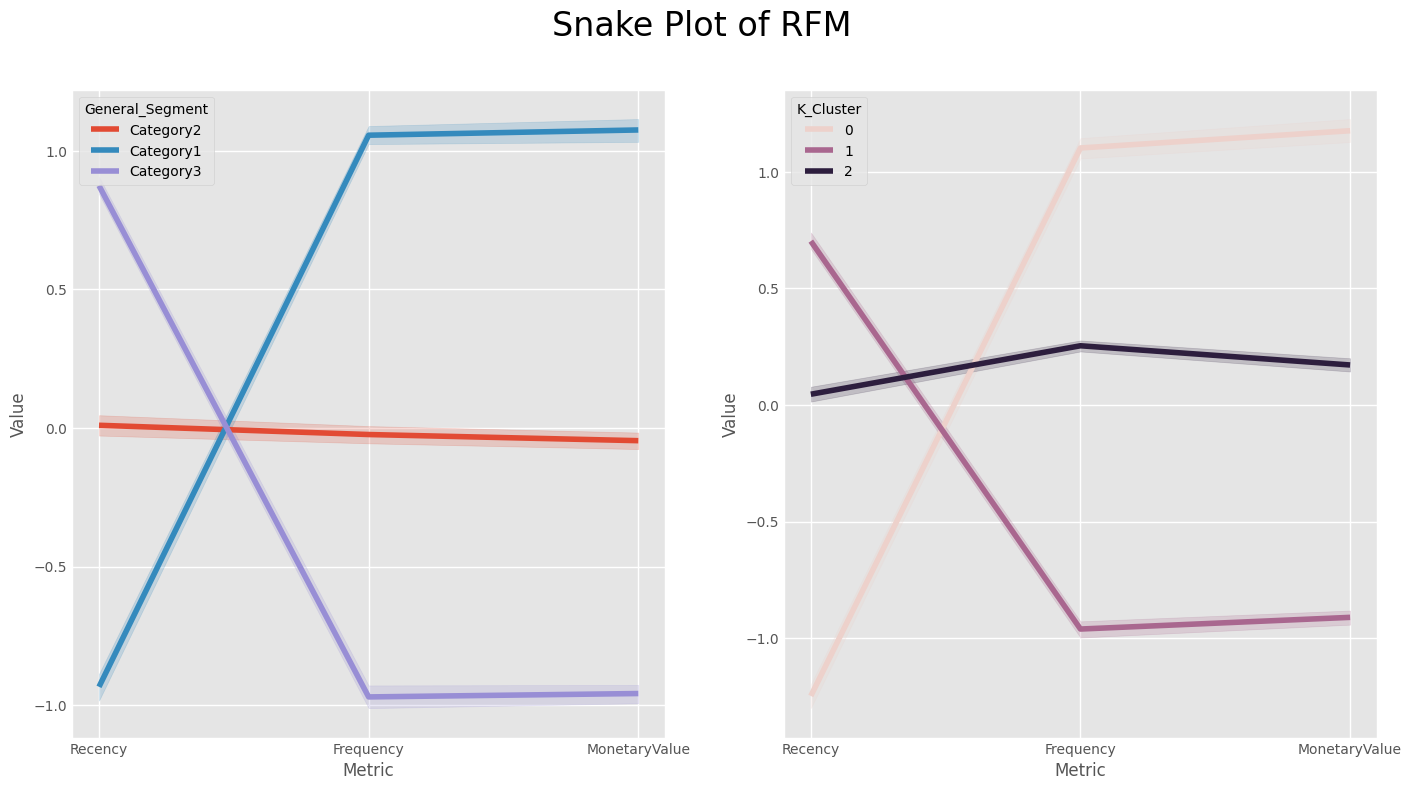

In [46]:
# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# create a line plot of 'Value' vs 'Metric', colored by 'General_Segment'
sns.lineplot(x='Metric', y='Value', hue='General_Segment', data=rfm_melt, ax=ax1)

# create a line plot of 'Value' vs 'Metric', colored by 'K_Cluster'
sns.lineplot(x='Metric', y='Value', hue='K_Cluster', data=rfm_melt, ax=ax2)

# add a title to the figure
fig.suptitle("Snake Plot of RFM", fontsize=24)

# display the figure
plt.show()


In [47]:
total_avg = rfm.iloc[:, 0:3].mean()

cluster_avg = rfm.groupby('General_Segment').mean().iloc[:, 0:3]
prop_rfm = cluster_avg/total_avg - 1

cluster_avg_K = rfm.groupby('RFM Cluster').mean().iloc[:, 0:3]
prop_rfm_K = cluster_avg_K/total_avg - 1

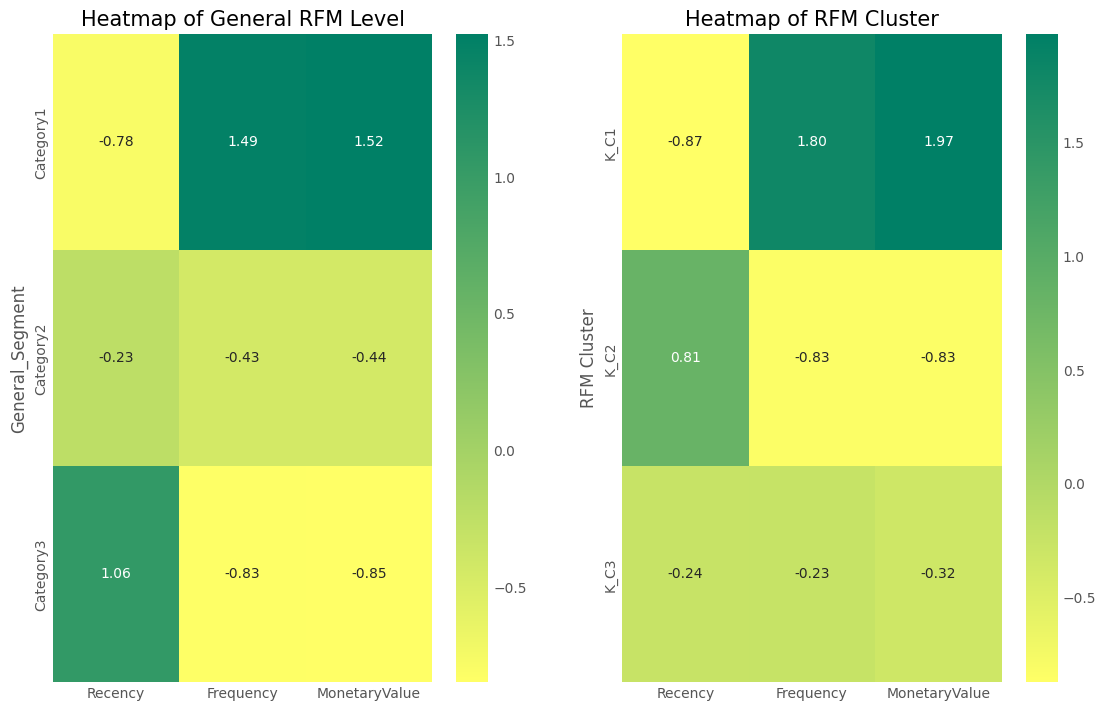

In [48]:
fig, ax = plt.subplots(ncols=2, figsize=(12,8))
sns.heatmap(prop_rfm, cmap= 'summer_r', fmt= '.2f', annot = True, ax=ax[0])
sns.heatmap(prop_rfm_K, cmap= 'summer_r', fmt= '.2f', annot = True, ax=ax[1])

ax[0].set_title('Heatmap of General RFM Level', size=15)
ax[1].set_title('Heatmap of RFM Cluster', size=15)

plt.show()

# Visualization

# #Unscaled-General_Segmentation

<Axes: xlabel='MonetaryValue', ylabel='Frequency'>

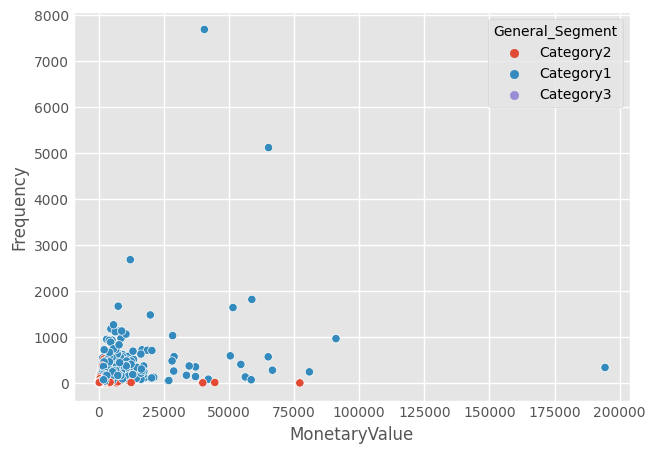

In [49]:
sns.scatterplot(data=rfm,x="MonetaryValue",y="Frequency",hue="General_Segment")

<Axes: xlabel='Recency', ylabel='Frequency'>

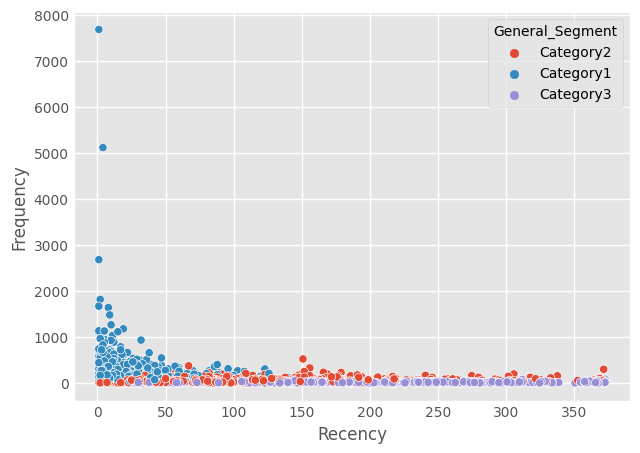

In [50]:
sns.scatterplot(data=rfm,x="Recency",y="Frequency",hue="General_Segment")

<Axes: xlabel='MonetaryValue', ylabel='Recency'>

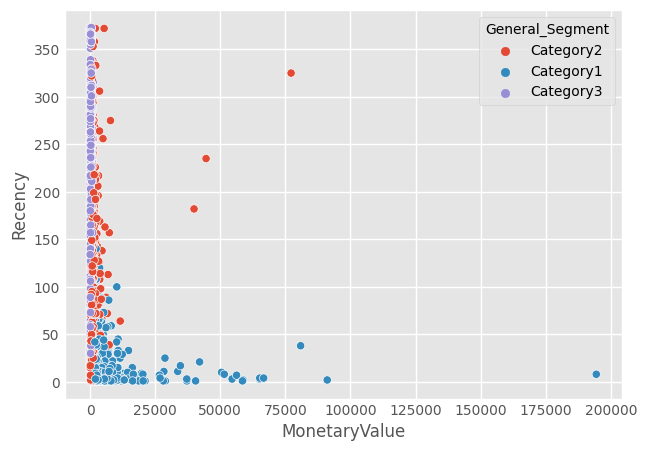

In [51]:
sns.scatterplot(data=rfm,x="MonetaryValue",y="Recency",hue="General_Segment")

# #Scaled-General_Segmentation

<Axes: xlabel='Recency', ylabel='Frequency'>

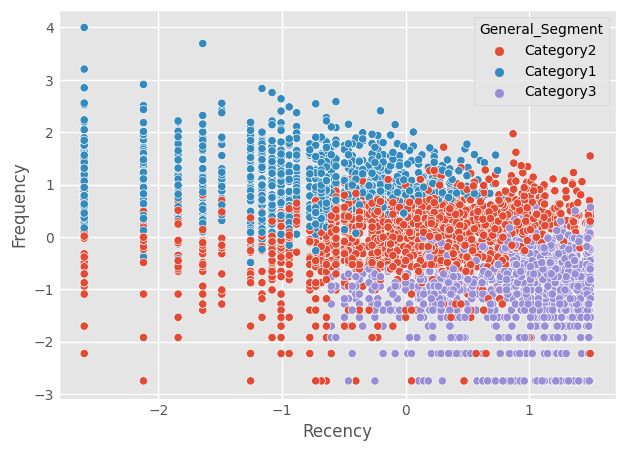

In [52]:
sns.scatterplot(data=rfm_normalized,x="Recency",y="Frequency",hue="General_Segment")

<Axes: xlabel='MonetaryValue', ylabel='Frequency'>

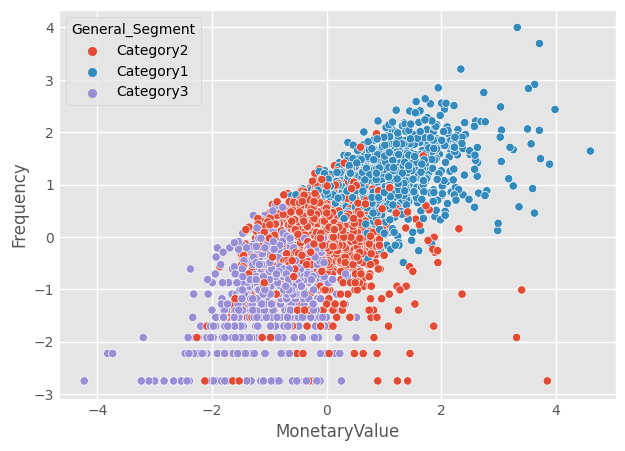

In [53]:
sns.scatterplot(data=rfm_normalized,x="MonetaryValue",y="Frequency",hue="General_Segment")

<Axes: xlabel='MonetaryValue', ylabel='Recency'>

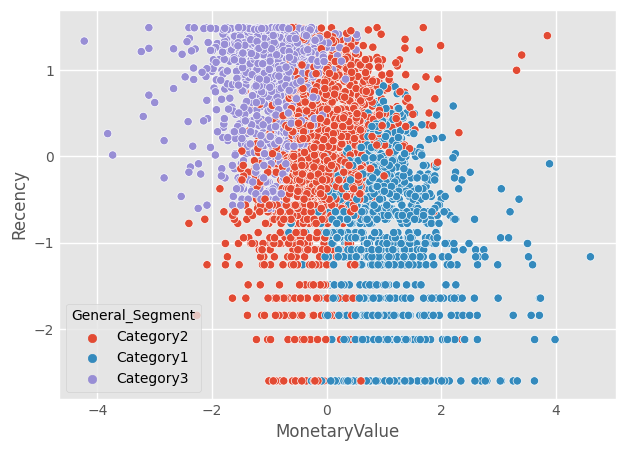

In [54]:
sns.scatterplot(data=rfm_normalized,x="MonetaryValue",y="Recency",hue="General_Segment")

# #Unscaled-KMeans

<Axes: xlabel='MonetaryValue', ylabel='Frequency'>

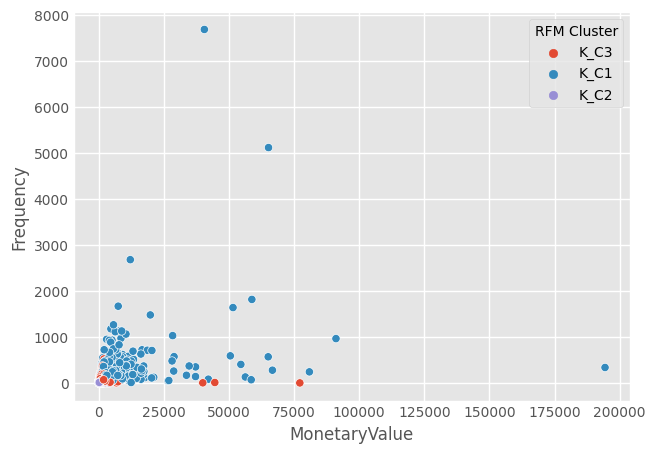

In [55]:
sns.scatterplot(data=rfm,x="MonetaryValue",y="Frequency",hue="RFM Cluster")

<Axes: xlabel='Recency', ylabel='Frequency'>

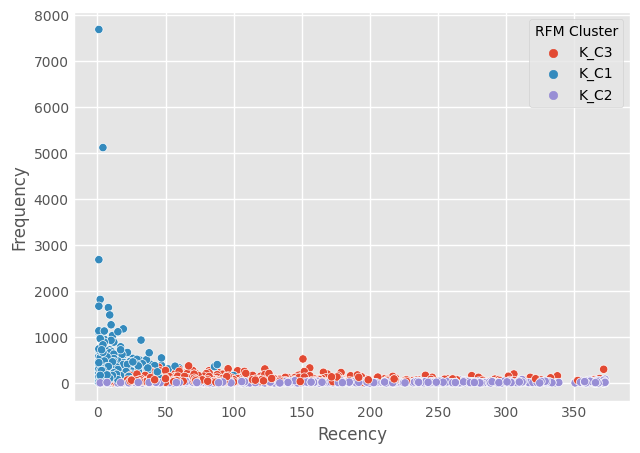

In [56]:
sns.scatterplot(data=rfm,x="Recency",y="Frequency",hue="RFM Cluster")

<Axes: xlabel='MonetaryValue', ylabel='Recency'>

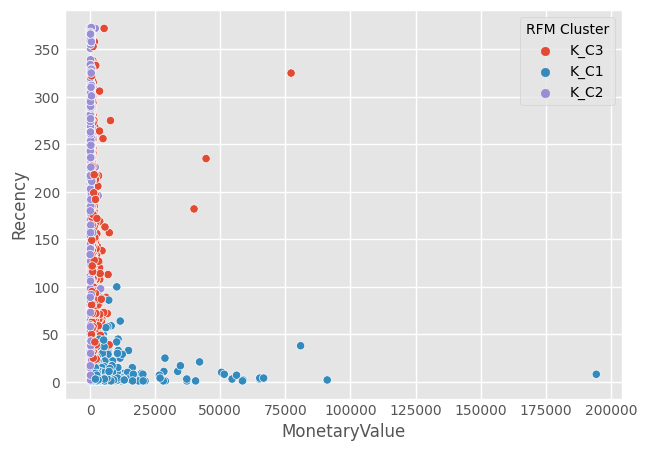

In [57]:
sns.scatterplot(data=rfm,x="MonetaryValue",y="Recency",hue="RFM Cluster")

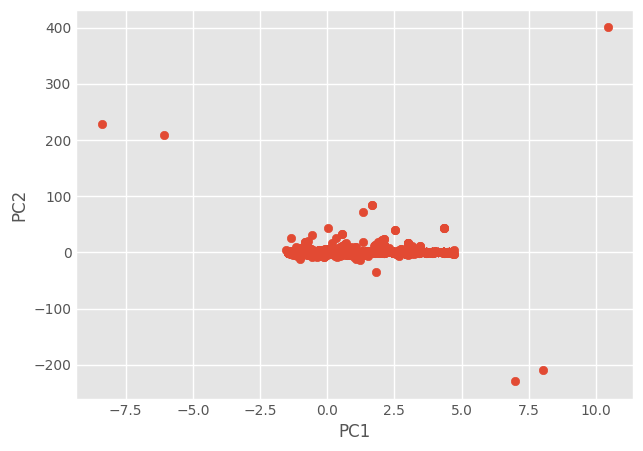

In [59]:
# import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# load the online_retail dataset
df = pd.read_excel("Online_Retail.xlsx")

# preprocess the data by dropping rows with missing values and converting categorical variables to numerical values
df.dropna(inplace=True)
df["Country"] = df["Country"].astype("category")
df["Country_cat"] = df["Country"].cat.codes

# select the features to be used for PCA
features = ["Quantity", "UnitPrice", "CustomerID", "Country_cat"]

# standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# perform PCA with 2 principal components
pca = PCA(n_components=2)
pca.fit(df_scaled)
pca_scores = pca.transform(df_scaled)

# add the PCA scores to the original dataframe
df["PC1"] = pca_scores[:, 0]
df["PC2"] = pca_scores[:, 1]

# visualize the results using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(df["PC1"], df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


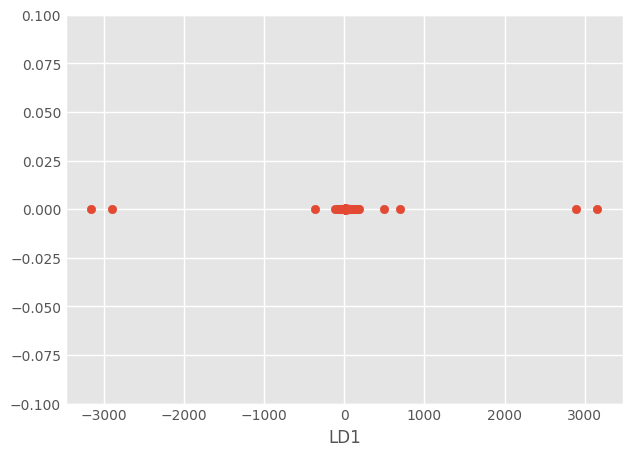

In [60]:
# import necessary libraries
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# load the online_retail dataset
df = pd.read_excel("Online_Retail.xlsx")

# preprocess the data by dropping rows with missing values
df.dropna(inplace=True)

# encode the categorical variable "Country" to numerical values
le = LabelEncoder()
df["Country_cat"] = le.fit_transform(df["Country"])

# select the features and target variable for LDA
features = ["Quantity", "UnitPrice", "Country_cat"]
target = "InvoiceNo"

# convert the target variable to a one-dimensional array of labels
target_labels = df[target].astype("category").cat.codes.ravel()

# perform LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
lda_scores = lda.fit_transform(df[features], target_labels)

# add the LDA scores to the original dataframe
df["LD1"] = lda_scores

# visualize the results using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(df["LD1"], [0] * len(df))
plt.xlabel("LD1")
plt.ylim(-0.1, 0.1)
plt.show()
